In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils.dataManagers.steward import DataSteward
from utils.dataManagers.informations import informer

In [2]:
ds = DataSteward()
column_desc = informer.get_column_descriptions()

train = ds.train_data
test = ds.test_data
ytrain = ds.train_response

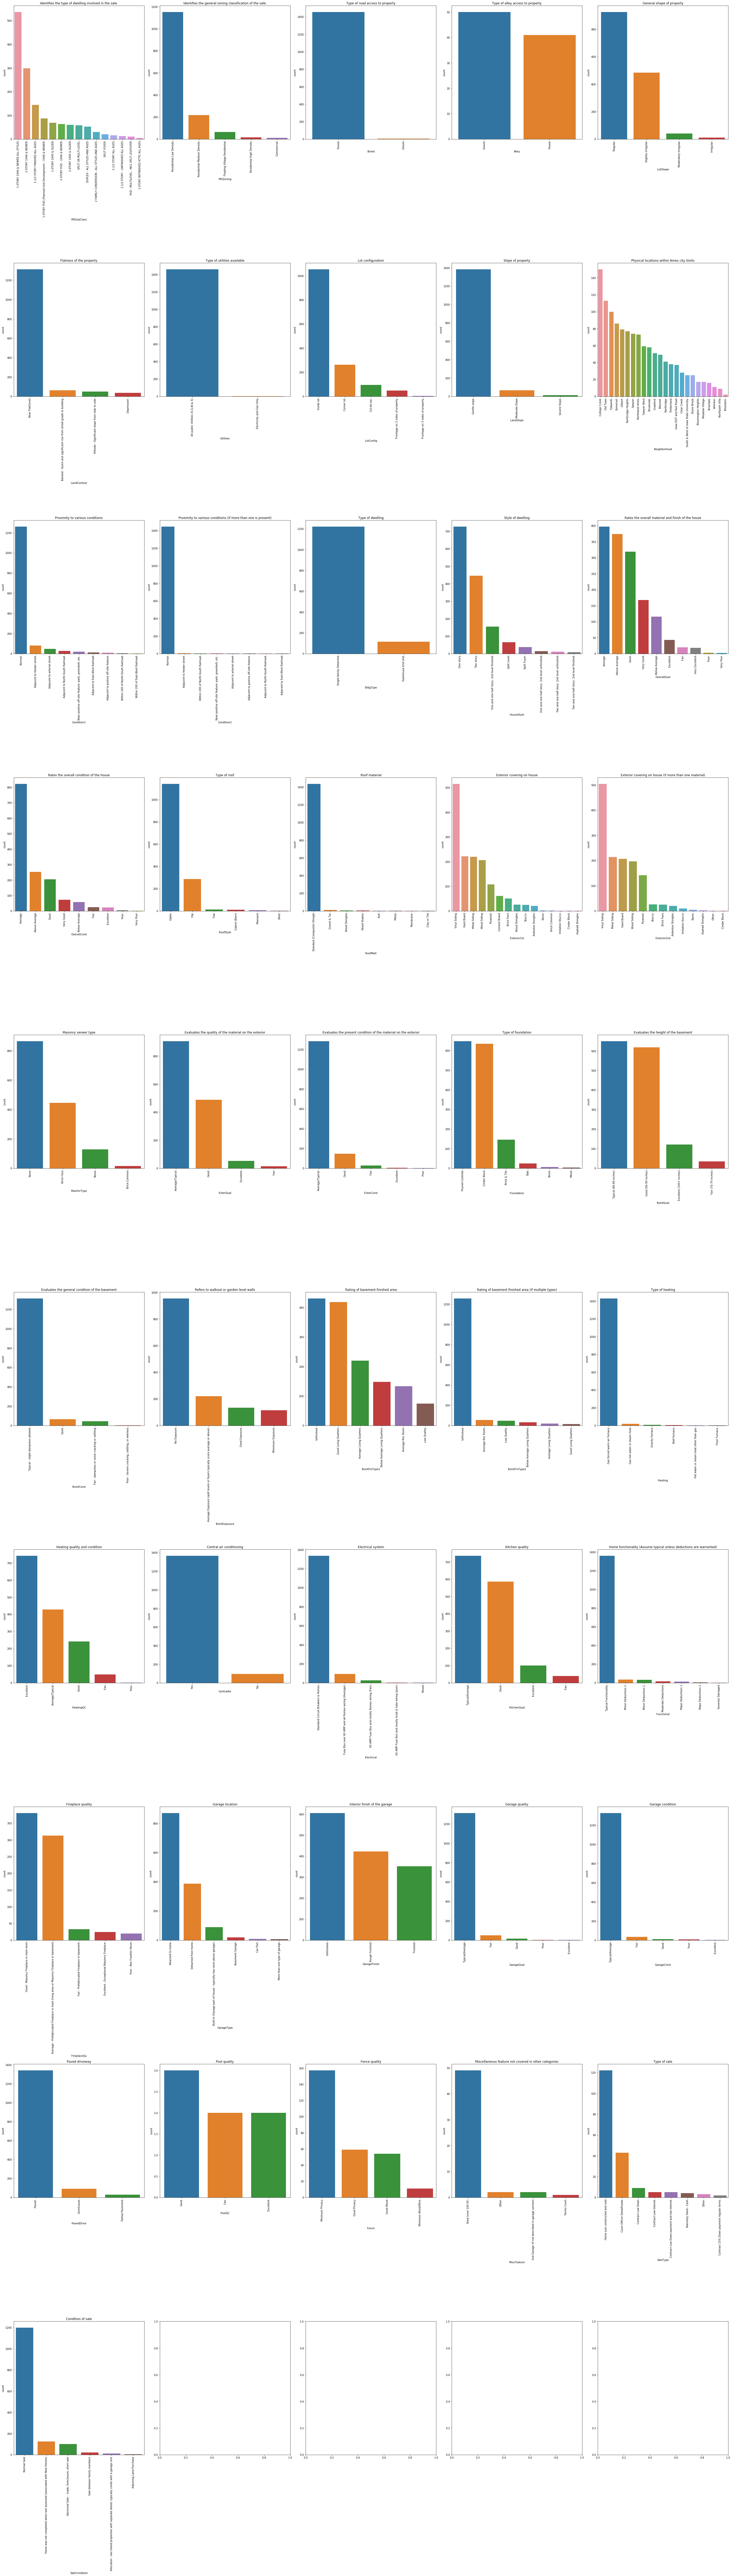

In [10]:
def rotate_x_ticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

def get_list_of_columns_ordered_by_value_counts(series):
    return list(series.value_counts().index)
        
def plot_categoricals(categorical, ncols = 2, figsize_ratio=[8, 14]):
    nrows = math.ceil(categorical.shape[1] / ncols)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows))

    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(categorical):
        axes = ax[i]
        sns.countplot(categorical[cat], ax=axes, order= get_list_of_columns_ordered_by_value_counts(categorical[cat]))
        rotate_x_ticks(ax[i])
        axes.set_title(column_desc[cat])
    plt.tight_layout()
    
categorical = train.select_dtypes(['category'])  
plot_categoricals(categorical, ncols=5)

In [11]:
categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,Residential Low Density,Paved,NaN,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,...,Attached to home,Rough Finished,Typical/Average,Typical/Average,Paved,NaN,NaN,NaN,NaN,Normal Sale
1,1-STORY 1946 & NEWER ALL STYLES,Residential Low Density,Paved,NaN,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Frontage on 2 sides of property,Gentle slope,Veenker,...,Attached to home,Rough Finished,Typical/Average,Typical/Average,Paved,NaN,NaN,NaN,NaN,Normal Sale
2,2-STORY 1946 & NEWER,Residential Low Density,Paved,NaN,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,...,Attached to home,Rough Finished,Typical/Average,Typical/Average,Paved,NaN,NaN,NaN,NaN,Normal Sale
3,2-STORY 1945 & OLDER,Residential Low Density,Paved,NaN,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Corner lot,Gentle slope,Crawford,...,Detached from home,Unfinished,Typical/Average,Typical/Average,Paved,NaN,NaN,NaN,NaN,"Abnormal Sale - trade, foreclosure, short sale"
4,2-STORY 1946 & NEWER,Residential Low Density,Paved,NaN,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Frontage on 2 sides of property,Gentle slope,Northridge,...,Attached to home,Rough Finished,Typical/Average,Typical/Average,Paved,NaN,NaN,NaN,NaN,Normal Sale


In [5]:
number_type = train.select_dtypes(['int64', 'float64']) 
del number_type['Id']
number_type.head()
number_type.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [6]:
rows_with_nulls = number_type.loc[number_type.isnull().any(axis=1),number_type.isnull().any()]
rows_with_nulls.head()

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0


In [46]:
for c in rows_with_nulls.columns:
    print(column_desc[c])

Linear feet of street connected to property
Masonry veneer area in square feet
Year garage was built


In [7]:
number_type.BedroomAbvGr.describe()

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

0 LotFrontage
1 LotArea
2 YearBuilt
3 YearRemodAdd
4 MasVnrArea
5 BsmtFinSF1
6 BsmtFinSF2
7 BsmtUnfSF
8 TotalBsmtSF
9 1stFlrSF
10 2ndFlrSF
11 LowQualFinSF
12 GrLivArea
13 BsmtFullBath
14 BsmtHalfBath
15 FullBath
16 HalfBath
17 BedroomAbvGr
18 KitchenAbvGr
19 TotRmsAbvGrd
20 Fireplaces
21 GarageYrBlt
22 GarageCars
23 GarageArea
24 WoodDeckSF
25 OpenPorchSF
26 EnclosedPorch
27 3SsnPorch
28 ScreenPorch
29 PoolArea
30 MiscVal
31 MoSold
32 YrSold


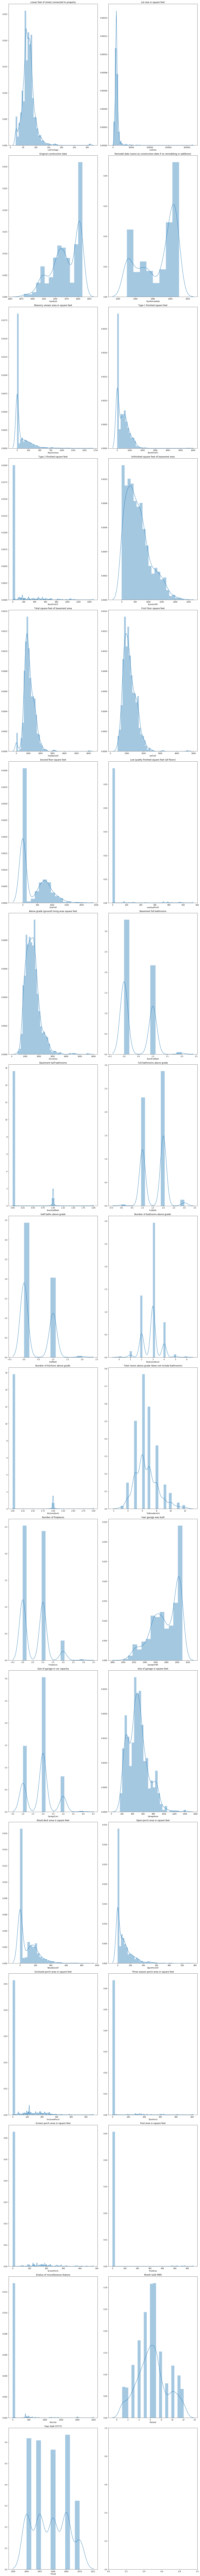

In [5]:
def plot_number_type_data(df, ncols = 2, figsize_ratio=[8, 12]):
    nrows = math.ceil(df.shape[1] / ncols)
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows))
    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(df):
        axes = ax[i]
        sns.distplot(df[cat], ax=axes)
        axes.set_title(column_desc[cat])
    plt.tight_layout()
    
plot_number_type_data(number_type.dropna())

# Find way to deal with null values!

In [3]:
def get_columns_with_null_values(df):
    return df.loc[df.isnull().any(axis=1),df.isnull().any()].columns

In [9]:
train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [6]:
get_columns_with_null_values(train)

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [7]:
test.GarageArea.mean()

472.76886145404666

In [6]:
test.GarageArea.describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [14]:
def fill_with_mean(data):
    df = data.copy()
    for c in get_columns_with_null_values(df):
        df[c] = df[c].fillna(df[c].mean())
    return df
        
df = fill_with_mean(test)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [56]:
def get_df_for_predictions(data):
    df = data.copy()
    del df['Id']
    number_type = df.select_dtypes(['int64', 'float64']) 
    number_type = df.fillna(df.mean())
    categorical = pd.get_dummies(df.select_dtypes(['category']))
    categorical.reset_index(inplace=True)
    return categorical, number_type

train_categorical, train_number_type = get_df_for_predictions(train)

sd = StandardScaler()
number_type_normalized = sd.fit_transform(train_number_type)
number_type_normalized = pd.DataFrame(number_type_normalized, columns = train_number_type.columns)
number_type_normalized.head()

x_train = train_categorical.join(number_type_normalized)

y_train_dropped = ytrain.drop(ytrain.index[rows_with_nulls.index - 1])


ValueError: fill value must be in categories

In [49]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x_train, y_train_dropped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
test_categorical, test_number_type = get_df_for_predictions(test)

test_nt_norm =  sd.transform(test_number_type.dropna())
test_nt_norm = pd.DataFrame(test_nt_norm, columns = test_number_type.columns)

x_test = test_categorical.join(test_nt_norm)

predictions = clf.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [7]:
# df = train.dropna(subset=[rows_with_nulls.columns]).copy()
# del df['Id']
# number_type = df.select_dtypes(['int64', 'float64']) 
# categorical = pd.get_dummies(df.select_dtypes(['category']))
# categorical.reset_index(inplace=True)

In [8]:
# from sklearn.preprocessing import StandardScaler

# sd = StandardScaler()
# number_type_normalized = sd.fit_transform(number_type)
# number_type_normalized = pd.DataFrame(number_type_normalized, columns = number_type.columns)
# number_type_normalized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.233570,-0.205885,0.992930,0.823953,0.462009,0.571581,-0.282645,-0.986817,-0.496377,-0.822753,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,0.384834,-0.064358,0.120665,-0.460746,-0.572748,1.152559,-0.282645,-0.689078,0.415045,0.229055,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,-0.109889,0.138702,0.928317,0.776371,0.282510,0.101672,-0.282645,-0.355789,-0.352705,-0.656951,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,-0.439705,-0.070512,-1.850006,-0.746235,-0.572748,-0.475034,-0.282645,-0.120264,-0.720866,-0.550734,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,0.549742,0.509132,0.896011,0.681208,1.275032,0.462647,-0.282645,-0.231360,0.152394,-0.074052,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084


In [42]:
# x_train = categorical.join(number_type_normalized)
# x_train.head()

,index,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,0,0,0,1,0,0,0,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,1,1,0,0,0,0,0,0,0,0,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,2,0,0,0,0,0,1,0,0,0,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,3,0,0,0,0,0,0,1,0,0,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,4,0,0,0,0,0,1,0,0,0,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084


In [10]:
y_train_dropped = ytrain.drop(ytrain.index[rows_with_nulls.index - 1])
y_train_dropped.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [11]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [43]:
clf.fit(x_train, y_train_dropped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
test_transformed = sd.transform(test)

ValueError: could not convert string to float: 'Normal'

In [44]:
predictions = clf.predict(test)

ValueError: could not convert string to float: 'Normal'

c:\users\matka\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


c:\users\matka\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


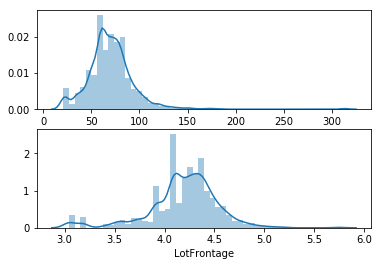

In [93]:
fig, ax = plt.subplots(nrows=2)

not_null_vals = train.LotFrontage[train.LotFrontage.notnull()]
sns.distplot(not_null_vals, ax=ax[0])
sns.distplot(np.log(not_null_vals), ax=ax[1])

c:\users\matka\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


c:\users\matka\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


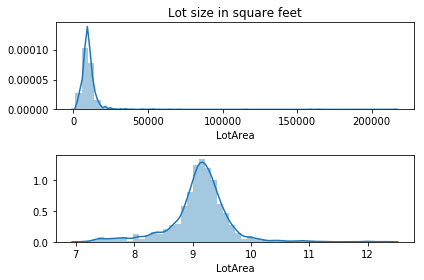

In [98]:
fig, ax = plt.subplots(nrows=2)

sns.distplot((train.LotArea), ax=ax[0])
sns.distplot(np.log(train.LotArea), ax=ax[1])
ax[0].set_title('Lot size in square feet')
plt.tight_layout()

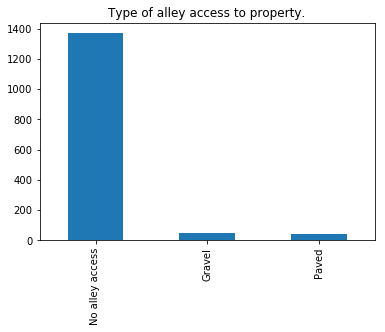

In [121]:
train.Alley.replace(Alley_MAPPING, inplace=True)
train.Alley.fillna('No alley access', inplace=True)

title = 'Type of alley access to property.'
plot_count_plot_of_variable('Alley', title)

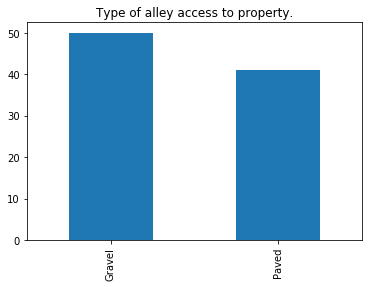

In [112]:
title = 'Type of alley access to property.'
plot_count_plot_of_variable('Alley', title, Alley_MAPPING)

In [76]:
def get_dummy_variables_for_object_dtypes(in_df, print_progress=False):
    df = in_df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            dummies = pd.get_dummies(train[col].values.astype(str), dummy_na=False)
            if print_progress:
                print(f'Getting dummies from {col} column')
                print(f'Columns are: {dummies.columns.values}')
            df = df.join(dummies, rsuffix='_' + col)
            del df[col]
    return df
            
df = get_dummy_variables_for_object_dtypes(train)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
def get_df_with_columns_contatining_nulls(input_df):
    return input_df.loc[:, input_df.isnull().any()]